## Анализ возможных накруток в голосовании Конкурса общественного признания в сфере бизнеса «Приоритет» 2024

Голосование проводилось на сайте "маленькая Сызрань" с 2024-09-01 00:00 по 2024-10-02 08:07 по 10 номинациям, в которых участвовало 53 номинанта. Для анализа представлен лог голосов, в который записывались следующие параметры: время, ip-адрес, браузер, куки, номер опроса и номер варианта голосования. Из лога взяты 30465 голосов.

**Голоса-накрутки выявляются по трем критериям:**

- голоса с одинакового сочетания ip-адрес и браузер. 
- голоса без куки
- голоса с быстрыми куками

**Голоса с одинакового сочетания ip-адрес и браузер**.
Оценивается именно пара ip-адрес и браузер, так как один внешний ip-адрес может быть, например, у организации или домашний интернет, который в квартире раздается по wi-fi. Пара ip-адрес+браузер позволяет более четко различать конкретные устройства, с которых голосовали. 
Голоса с пары ip-адрес+браузер, которая ранее уже была в логе для определенной номинации голосования, и вновь поступают в этой же номинации - считаются накрутками. 

Базовый процент голосов с дублирующимися ip и браузером от всех голосов составил - **51.67%**

**Голоса без куки**
Куки – это «пометочки», которые сайты могут оставлять в браузере, чтобы еще более четко различать устройства, с которых заходили на сайт. В частности, на куки работают «корзины» или «просмотренные товары». Сайт «маленькая Сызрань» оставляет пометку, с этого браузера госоловали в таком-то опросе. При повторном голосовании сайт считывает пометку из браузера, и если она есть, то голос не учитывается.
Кроме этого, в браузере посетителей остается куки от Яндекс.метрики, по которой ведется мониторинг посещаемости сайта. Именно куки от Яндекс.метрики записывается в лог голосования.
Если при голосовании в браузере не оказалось куки от Яндекс.метрики, то это может означает, что пользователи впервый зашел на сайт. В этого браузере прописывается кука, в которой зашифровано время ее создания, то есть первого визита на сайт и некий номер пользователя. При этого само голосование как минимум уже второй «просмотр» сайта (первый – зашли на страницу голосования, второй – само голосование), то есть при голосовании кука от Яндекс.метрики.
Если куки при получении голоса нет - это означает, что они вообще отключены. То есть на сработает первая даже защита от накруток, которая не дает голосовать повторного. Такие голоса считаются накрутками.

Базовый процент голосов без кук от всех голосов - **23.27%**

**Быстрые куки**
В куки Яндекс.метрики закодировано время ее создания, то есть первого посещения сайта. Если ее раскодировать и вычесть из времени голосования, то получим промежуток времени между первым визитом на сайт и голосом. Если эта дельта слишком маленькая это может говорить о том, что куки подчищаются после каждого голосования. Тогда заходя на сайт повторно с очищенными куками посетитель может проголосовать повторно, так как у него нет пометки, что он уже голосовал. 
Слишком быстрые куки могут быть свидетельством каких-то манипуляций с куками в браузере и также считаются накрутками. Хотя это может быть и действительно новый пользователь, который пришел по призыву где-нибудь в ВКонтакте «проголосуй за нас». Исходя из распределения голосов по дельта, критическим значением выбрано 10 секунд. 

Базовый процент голосов с быстрыми куками от всех голосов - **26.41%**


При анализе голосов для всех записей, которые подходят под критерии накруток ставиться «галочка». У голосов может быть несколько таких галочек. 

**Хорошие голоса** – это те, которые не попали ни под один критерий.

После анализа на признаки накруток всех 30 тысяч поданных голосов процент хороших составил - **38.65%**

**Итоги голосования в графиках и таблицах:**
*Красным отмечены значения больше среднего для признаков накруток, а для хороших голосов - меньше среднего*


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import datetime

In [2]:
try: 
    data = pd.read_csv('d:/practicum/14golos/voting_check.csv')
    voting = pd.read_csv('d:/practicum/14golos/voting.csv')
except:
    data = pd.read_csv('voting_check.csv')
    voting = pd.read_csv('voting.csv')

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.precision', 2)
plt.rcParams ['figure.figsize'] = [15, 8]
pd.set_option('display.max_colwidth', None)

In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
data.shape

(30610, 7)

In [6]:
data.head()

,id,time,ip,cock,agenta,variant,vote
0,1,1564850016,164.132.156.53,NaN,"Mozilla/5.0 (Linux; U; Android 8.1.0; ru-ru; Redmi 6A Build/O11019) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/71.0.3578.141 Mobile Safari/537.36 XiaoMi/MiuiBrowser/10.9.7-g",3,4
1,2,1565584127,164.132.156.56,NaN,"Mozilla/5.0 (Linux; Android 4.1.2; GT-N8000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 YaBrowser/18.11.1.1011.01 Safari/537.36",1,31
2,3,1565584193,164.132.156.56,NaN,"Mozilla/5.0 (Linux; Android 4.1.2; GT-N8000) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 YaBrowser/18.11.1.1011.01 Safari/537.36",3,18
3,4,1566329799,164.132.156.56,NaN,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36",8,4
4,5,1566329834,164.132.156.56,NaN,"Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.100 Safari/537.36",5,2


### Исследовательский анализ данных

Какие голосования в датасете

In [7]:
data.groupby('vote')['vote'].count()

vote
1        12
2        14
4        11
5         6
6         1
7         1
8         4
9         3
10        2
12        1
14        5
16        2
18        3
19        1
20        5
21        6
24        1
31        6
33        5
34        3
35        5
36        4
37        6
46       12
47        7
48        5
49        1
51        9
79        3
97      478
98      811
99     6310
100    3829
101    9540
102    4731
103     571
104     834
105    1709
106    1653
Name: vote, dtype: int64

Оставляем только нужные номинации №№ 97 - 106

In [8]:
data = data.query('97 <= vote <= 106')

Определим границы времени голосования в датасете

In [9]:
print('Минимальное время', pd.to_datetime(data['time'].min(),unit='s'))
print('Максимальное время', pd.to_datetime(data['time'].max(),unit='s'))

Минимальное время 2024-08-30 09:30:07
Максимальное время 2024-10-02 08:07:44


Устаналиваем границы времени голосования, которые пойдут в анализ c 2024-09-01 00:00 по 2024-10-01 00:00

In [10]:
print(datetime.datetime(2024, 9, 1, 0, 0).timestamp())
print(datetime.datetime(2024, 10, 1, 0, 0).timestamp())

1725134400.0
1727726400.0


Убираем из датасета голоса вне временных границ. Взята только нижняя граница

In [11]:
#data = data.query('1725134400 <= time <= 1727726400')
data = data.query('1725134400 <= time')

In [12]:
data = data.reset_index(drop=True)

In [13]:
data.shape

(30465, 7)

In [14]:
data.head()

,id,time,ip,cock,agenta,variant,vote
0,103,1725172883,62.84.103.228,171761961885836234,"Mozilla/5.0 (iPhone; CPU iPhone OS 17_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.6 Mobile/15E148 Safari/604.1",6,97
1,104,1725172951,178.176.81.94,172517283334329804,"Mozilla/5.0 (Linux; Android 14; SAMSUNG SM-A356E) AppleWebKit/537.36 (KHTML, like Gecko) SamsungBrowser/23.0 Chrome/115.0.0.0 Mobile Safari/537.36",4,100
2,105,1725173393,178.176.81.139,172517322188479278,"Mozilla/5.0 (iPhone; CPU iPhone OS 17_5_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Mobile/15E148 Safari/604.1",2,102
3,106,1725173649,62.118.73.25,1695900350403807624,"Mozilla/5.0 (Linux; arm_64; Android 14; V2231) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.6478.147 YaBrowser/24.7.4.147.00 SA/3 Mobile Safari/537.36",5,105
4,107,1725173709,178.45.93.91,1725173535761356867,"Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/16.1 Mobile/15E148 Safari/604.1",5,98


### Сводная таблица по номинантам

In [15]:
data['vote_time'] = pd.to_datetime(data['time'],unit='s').dt.floor('H')
data['cc'] = 1

In [16]:
golosa_all = data.query('vote > 90').groupby(['vote', 'variant'])\
    .agg({'vote': 'min', 'variant': 'min', 'time' : 'min', 'id' : 'count'})
golosa_all = golosa_all.reset_index(drop=True)
golosa_all.columns = ['vote', 'variant', 'title', 'all']
#golosa_all

In [17]:
varr = {}
for vo in range(97, 107):
    var = re.sub('<[^<]+?>', '', voting.query('id == @vo')['questions'].values[0]).split('|')
    var.pop()
    varr[vo] = var
for i in range(len(golosa_all)):
    vo = golosa_all.loc[i, 'vote']
    va = golosa_all.loc[i, 'variant']
    golosa_all.loc[i, 'title'] = varr[vo][va-1]    

### Дубли ip и браузера

In [18]:
data['bad_ip_a'] = 0

In [19]:
data.loc[data[['ip', 'agenta', 'vote', 'variant']].duplicated(keep=False), 'bad_ip_a'] = 1

In [20]:
dd = pd.DataFrame(data.groupby(['vote', 'variant'])['bad_ip_a'].sum())
dd.reset_index(inplace=True)

In [21]:
golosa_all = golosa_all.merge(dd, how='left', on=['vote', 'variant'] )

In [22]:
golosa_all['bad_ip_a_%'] = round(100 * golosa_all['bad_ip_a'] / golosa_all['all'], 2) 

Базовый процент голосов с дублирующимися ip и браузером от всех голосов

In [23]:
bad_ip_a_proc = round(100 * data.query('bad_ip_a == 1')['id'].count() / data['id'].count(), 2)
bad_ip_a_proc

51.67

### Пустые куки

In [24]:
data['cock'].isna().sum()

7090

In [25]:
data['cock'].isna().sum() / data['cock'].count()

0.3033155080213904

In [26]:
data['no_cock'] = 0

In [27]:
data.loc[data['cock'].isna(), 'no_cock'] = 1

In [28]:
dd = pd.DataFrame(data.groupby(['vote', 'variant'])['no_cock'].sum())
dd.reset_index(inplace=True)

In [29]:
golosa_all = golosa_all.merge(dd, how='left', on=['vote', 'variant'] )

In [30]:
golosa_all['no_cock_%'] = round(100 * golosa_all['no_cock'] / golosa_all['all'], 2) 

Базовый процент голосов без кук от всех голосов

In [31]:
no_cock_proc = round(100 * data.query('no_cock == 1')['id'].count() / data['id'].count(), 2)
no_cock_proc

23.27

### Быстрые куки

In [32]:
dd = data.loc[data['cock'].notna()]

In [33]:
data['time_cock'] = 0

In [34]:
data['time_cock'] = dd['time'] - pd.to_numeric(dd['cock'].str[:10], errors='coerce')

Процент голосов с отрицательным временем голосования по кукам

In [35]:
round(100 * data.query('time_cock <= 0')['id'].count() / data['id'].count(), 2)

3.27

Распределение быстрых кук для отсечения самых самых быстрых

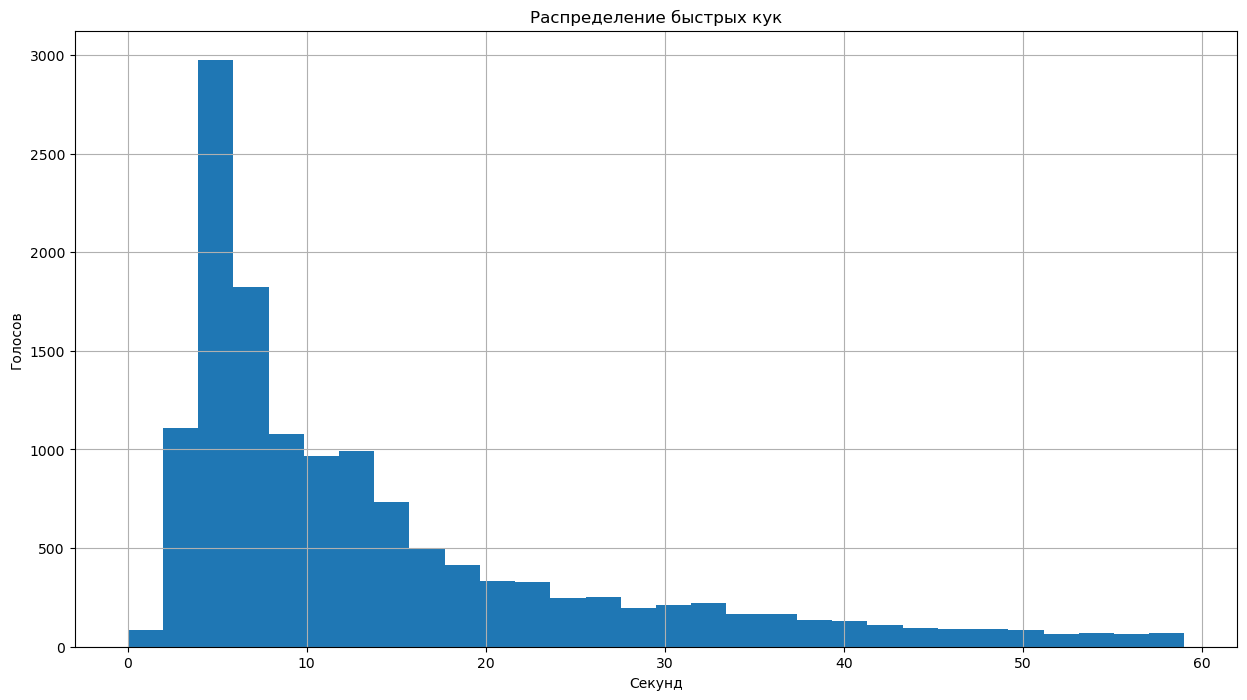

In [36]:
data.query('0 <= time_cock < 60')['time_cock'].hist(bins=30)
plt.ylabel('Голосов')
plt.xlabel('Секунд')
plt.title('Распределение быстрых кук')
plt.show()   

За границу быстрых кук принимает 10 секунд

Процент голосов с куками от 0 до 10 секунд от кук, у которых есть время

In [37]:
round(100 * data.query('0 <= time_cock < 10')['time_cock'].count() / data['time_cock'].count(), 2)

30.27

Обнуляем время голосования для пустых кук

In [38]:
data.loc[data['time_cock'].isna(), 'time_cock'] = 0

In [39]:
data['fast_cock'] = 0

In [40]:
data.loc[(data['time_cock'] < 10) & (data['no_cock'] == 0), 'fast_cock'] = 1

In [41]:
dd = pd.DataFrame(data.groupby(['vote', 'variant'])['fast_cock'].sum())
dd.reset_index(inplace=True)

In [42]:
golosa_all = golosa_all.merge(dd, how='left', on=['vote', 'variant'] )

In [43]:
golosa_all['fast_cock_%'] = round(100 * golosa_all['fast_cock'] / golosa_all['all'], 2) 

Процент голосов с быстрыми куками

In [44]:
fast_cock_proc = round(100 * data.query('fast_cock == 1')['id'].count() / data['id'].count(), 2)
fast_cock_proc

26.41

### Хорошие голоса

In [45]:
data['good'] = 0

In [46]:
data['good'] = data['bad_ip_a']  + data['no_cock']  + data['fast_cock']

In [47]:
data['good'] = data['good'].apply(lambda x: 0 if x > 0 else 1)

In [48]:
dd = pd.DataFrame(data.groupby(['vote', 'variant'])['good'].sum())
dd.reset_index(inplace=True)

In [49]:
golosa_all = golosa_all.merge(dd, how='left', on=['vote', 'variant'] )

In [50]:
golosa_all['good_%'] = round(100 * golosa_all['good'] / golosa_all['all'], 2) 

Процент хороших голосов

In [51]:
good_proc = round(100 * data.query('good == 1')['id'].count() / data['id'].count(), 2)
good_proc

38.65

### Итоговая сводная таблица голосов

Для отдельных номинантов красным подсвечиваются признаки накруток, доля которых больше базового процента. Для хороших голосов красным подсвечивается доля меньше базового процента хороших голосов.

In [52]:
def highlight_proc(s, proc):
    return ['background-color: tomato' if val > proc else 'background-color: lime' for val in s]

def highlight_good(s, proc):
    return ['background-color: tomato' if val < good_proc else 'background-color: lime' for val in s]

In [53]:
golosa_all.style.apply(highlight_proc, proc=bad_ip_a_proc, subset='bad_ip_a_%')\
    .apply(highlight_proc, proc=no_cock_proc, subset='no_cock_%')\
    .apply(highlight_proc, proc=fast_cock_proc,  subset='fast_cock_%')\
    .apply(highlight_good, proc=good_proc,  subset='good_%')\
    .format({'bad_ip_a_%': '{:,.2f}', 'no_cock_%': '{:,.2f}', 'fast_cock_%': '{:,.2f}', 'good_%': '{:,.2f}'})

,vote,variant,title,all,bad_ip_a,bad_ip_a_%,no_cock,no_cock_%,fast_cock,fast_cock_%,good,good_%
0,97,1,«Ollium» центр интеллектуального развития,46,18,39.13,6,13.04,0,0.00,26,56.52
1,97,2,«Юла» детская развивающая студия,197,7,3.55,18,9.14,1,0.51,171,86.80
2,97,3,«КВАТУТ» батутный центр,34,2,5.88,1,2.94,0,0.00,31,91.18
3,97,4,«Волшебный мир» агентство детских праздников,102,4,3.92,6,5.88,6,5.88,88,86.27
4,97,5,«Радуга» магазин детской одежды,46,0,0.00,0,0.00,1,2.17,45,97.83
5,97,6,«KIBERone» IT школа,53,2,3.77,2,3.77,0,0.00,49,92.45
6,98,1,«Добро» патронажное агентство,283,169,59.72,8,2.83,144,50.88,87,30.74
7,98,2,«SYZRAN- IT» сервисный центр,373,25,6.70,36,9.65,22,5.90,305,81.77
8,98,3,«Экосервис» клининговая компания,2,0,0.00,0,0.00,0,0.00,2,100.00
9,98,4,«Еврочистка» сеть химчисток,22,0,0.00,1,4.55,1,4.55,20,90.91


### Проверка

Для отдельного номинаната количество хороших голосов должно быть больше, либо равно, чем разница всех голосов и всех типов накруток. Номинанты, для которых это не выполняется:

In [54]:
golosa_all.query('all - bad_ip_a - no_cock - fast_cock > good')

,vote,variant,title,all,bad_ip_a,bad_ip_a_%,no_cock,no_cock_%,fast_cock,fast_cock_%,good,good_%


Проверка подчета накруток и голосов для отельного номинананта

In [55]:
qst='vote == 98 and variant == 2'

In [56]:
bad_ip_agenta = data.query(qst).groupby(['ip', 'agenta'])\
    .agg({ 'id' : 'count', 'ip' : 'min', 'agenta' : 'min'})\
    .reset_index(drop=True)
#     .sort_values(by='id', ascending=False)
bad_ip_agenta.rename(columns = {'id': 'сс'}, inplace = True)

In [57]:
bad_ip_agenta.query('сс > 1').sort_values(by='сс', ascending=False)

,сс,ip,agenta
252,8,80.234.76.150,"Mozilla/5.0 (Linux; Android 10; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/127.0.0.0 Mobile Safari/537.36"
269,5,81.200.219.17,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.0.0 Safari/537.36"
268,4,81.200.219.17,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 YaBrowser/24.7.0.0 Safari/537.36"
142,2,46.0.131.94,"Mozilla/5.0 (iPhone; CPU iPhone OS 17_5_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.5 Mobile/15E148 Safari/604.1"
179,2,46.53.250.127,"Mozilla/5.0 (iPhone; CPU iPhone OS 17_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/17.6 Mobile/15E148 Safari/604.1"
237,2,80.234.27.22,"Mozilla/5.0 (Linux; Android 13; K) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/128.0.6613.127 Mobile Safari/537.36"
285,2,85.113.52.198,"Mozilla/5.0 (iPhone; CPU iPhone OS 18_0 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/18.0 Mobile/15E148 Safari/604.1"


In [58]:
bad_ip_agenta.query('сс > 1')['сс'].sum()

25

In [59]:
data.query(qst)['cock'].isna().sum()

36

In [60]:
dd = data.query(qst)['time'] - pd.to_numeric(data.query(qst)['cock'].str[:10], errors='coerce')

In [61]:
dd[dd<10].count()

22

In [62]:
golosa_all.query(qst)

,vote,variant,title,all,bad_ip_a,bad_ip_a_%,no_cock,no_cock_%,fast_cock,fast_cock_%,good,good_%
7,98,2,«SYZRAN- IT» сервисный центр,373,25,6.70,36,9.65,22,5.90,305,81.77


## Сводный график

In [63]:
golosa_all.columns = ['vote', 'variant', 'Номинант', 'всего', 
                      'дубль ip браузер', 'дубль ip браузер %',
                      'нет куки', 'нет куки %', 
                      'быстрая кука', 'быстрая кука %', 
                      'хорошие', 'хорошие %']

In [64]:
golosa_all.columns = ['vote', 'variant', 'Номинант', 'всего', 
                      'дубль ip браузер', 'ip_%',
                      'нет куки', 'c_%', 
                      'быстрая кука', 'fc_%', 
                      'хорошие', 'g_%']

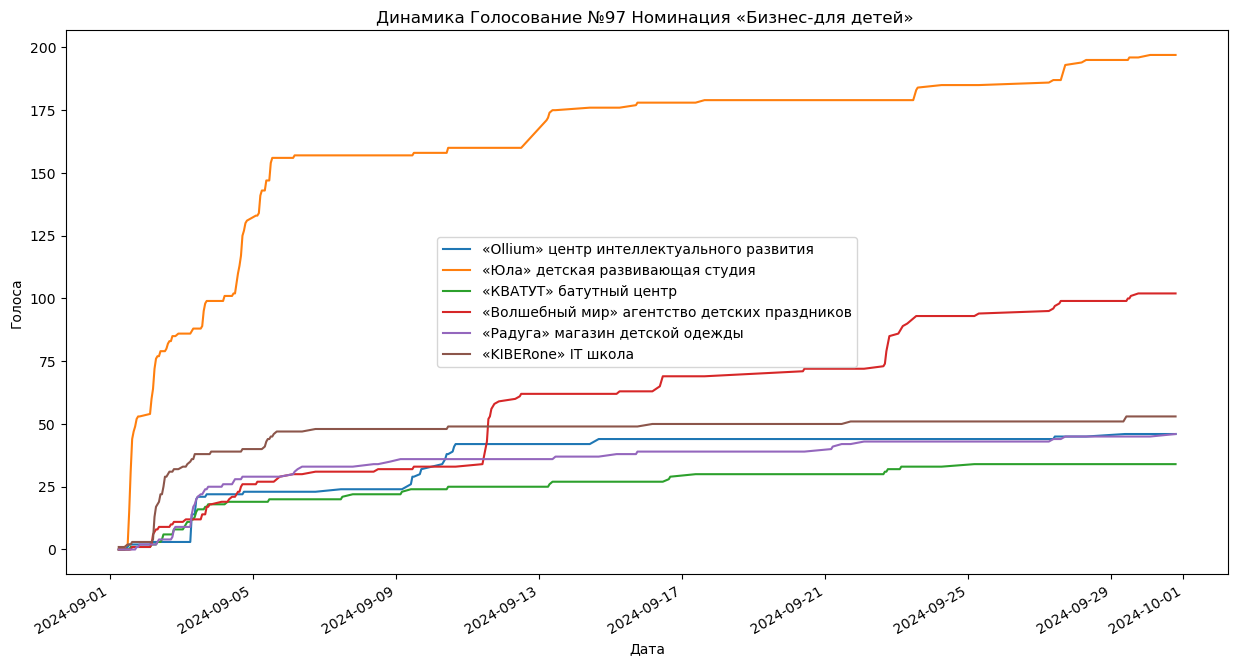

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
0,97,1,«Ollium» центр интеллектуального развития,46,18,39.13,6,13.04,0,0.00,26,56.52
1,97,2,«Юла» детская развивающая студия,197,7,3.55,18,9.14,1,0.51,171,86.80
2,97,3,«КВАТУТ» батутный центр,34,2,5.88,1,2.94,0,0.00,31,91.18
3,97,4,«Волшебный мир» агентство детских праздников,102,4,3.92,6,5.88,6,5.88,88,86.27
4,97,5,«Радуга» магазин детской одежды,46,0,0.00,0,0.00,1,2.17,45,97.83
5,97,6,«KIBERone» IT школа,53,2,3.77,2,3.77,0,0.00,49,92.45


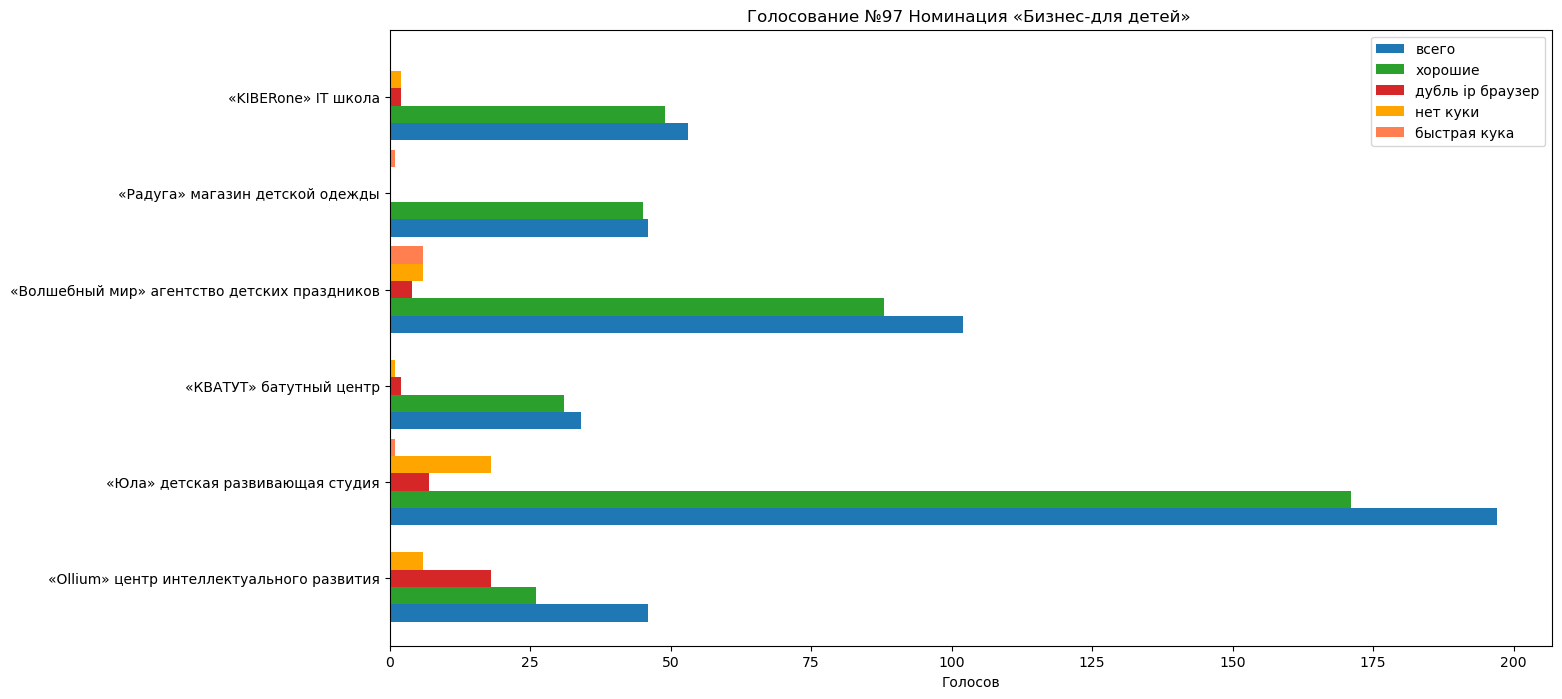

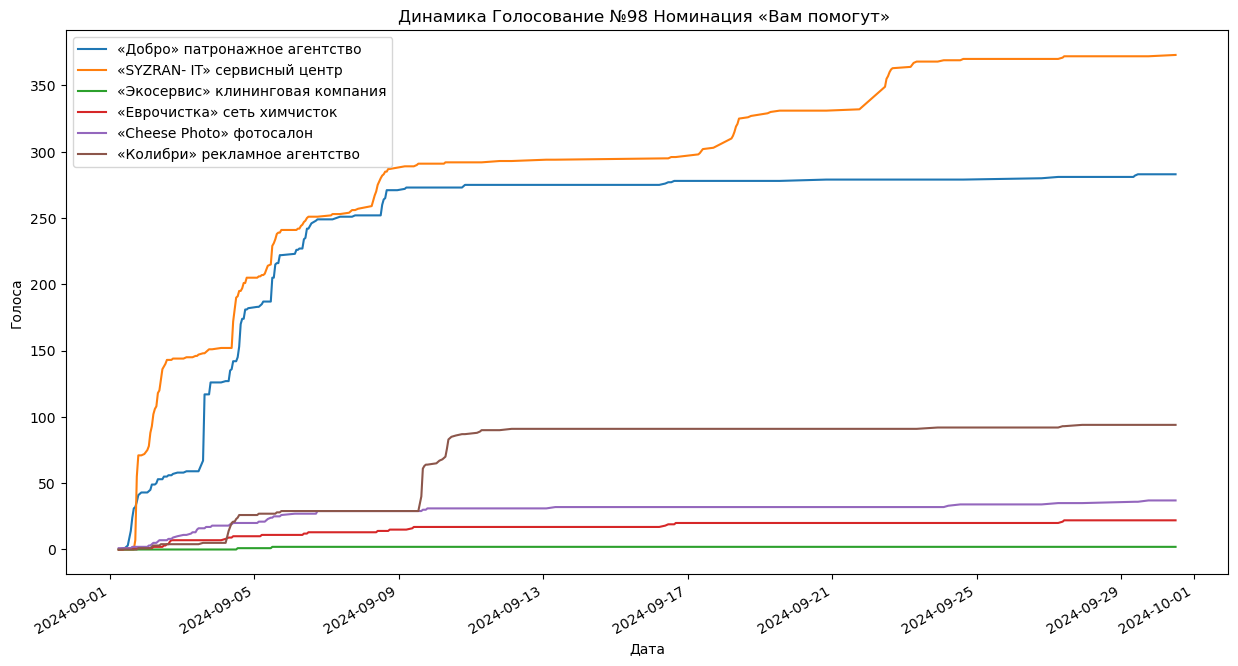

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
6,98,1,«Добро» патронажное агентство,283,169,59.72,8,2.83,144,50.88,87,30.74
7,98,2,«SYZRAN- IT» сервисный центр,373,25,6.70,36,9.65,22,5.90,305,81.77
8,98,3,«Экосервис» клининговая компания,2,0,0.00,0,0.00,0,0.00,2,100.00
9,98,4,«Еврочистка» сеть химчисток,22,0,0.00,1,4.55,1,4.55,20,90.91
10,98,5,«Cheese Photo» фотосалон,37,0,0.00,1,2.70,1,2.70,35,94.59
11,98,6,«Колибри» рекламное агентство,94,2,2.13,7,7.45,4,4.26,81,86.17


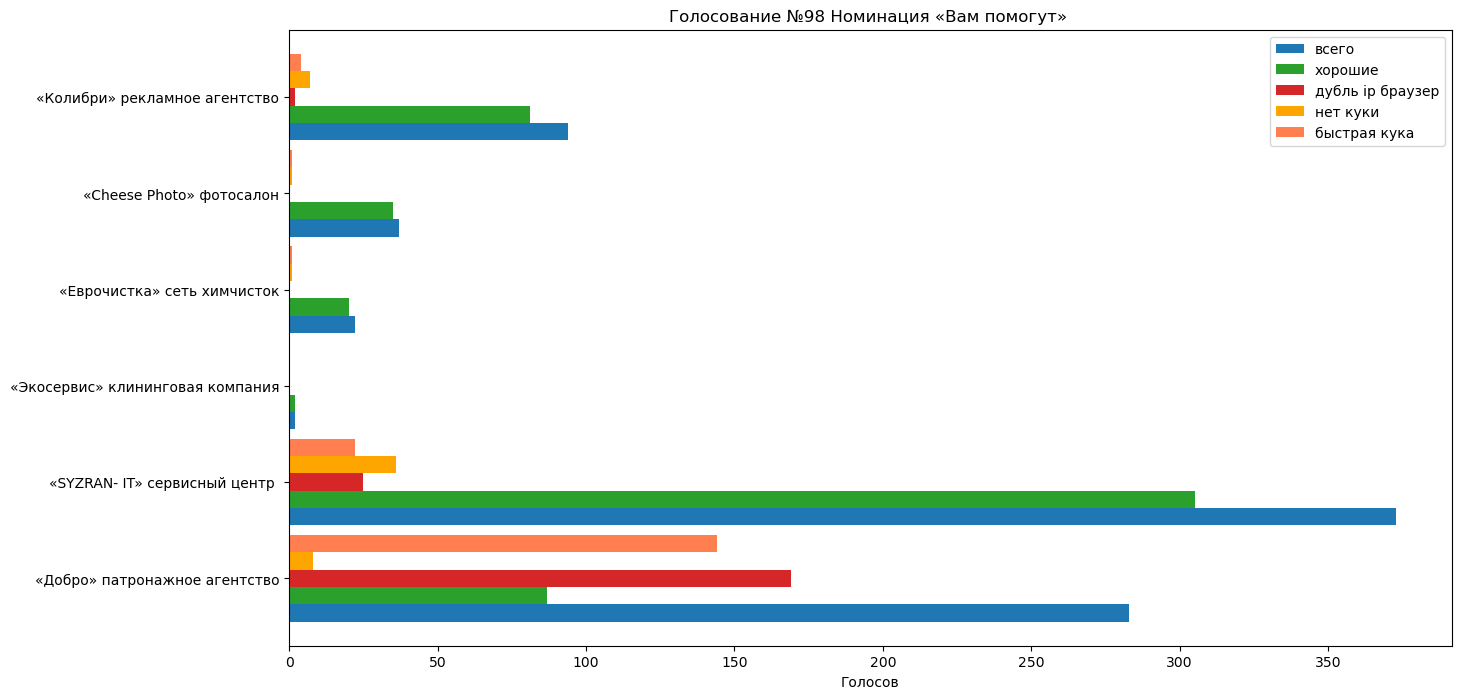

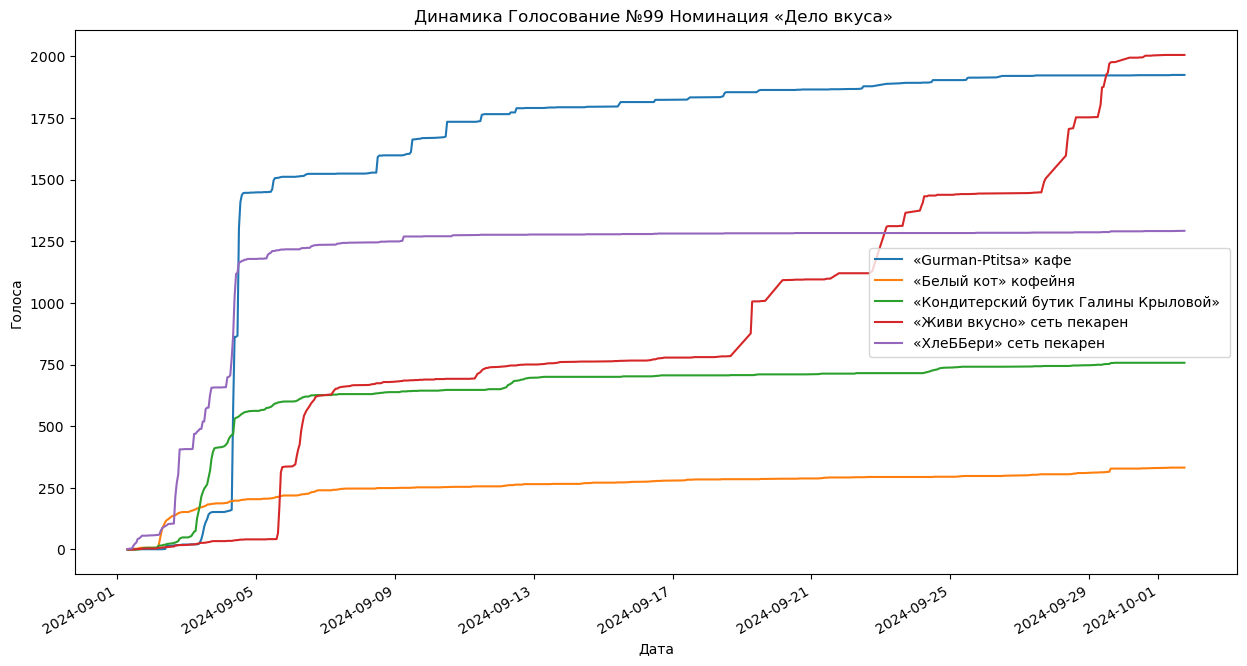

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
12,99,1,«Gurman-Ptitsa» кафе,1924,970,50.42,51,2.65,1039,54.00,668,34.72
13,99,2,«Белый кот» кофейня,332,22,6.63,34,10.24,29,8.73,260,78.31
14,99,3,«Кондитерский бутик Галины Крыловой»,757,90,11.89,139,18.36,20,2.64,576,76.09
15,99,4,«Живи вкусно» сеть пекарен,2005,1433,71.47,42,2.09,1265,63.09,522,26.03
16,99,5,«ХлеББери» сеть пекарен,1292,1059,81.97,1066,82.51,13,1.01,208,16.10


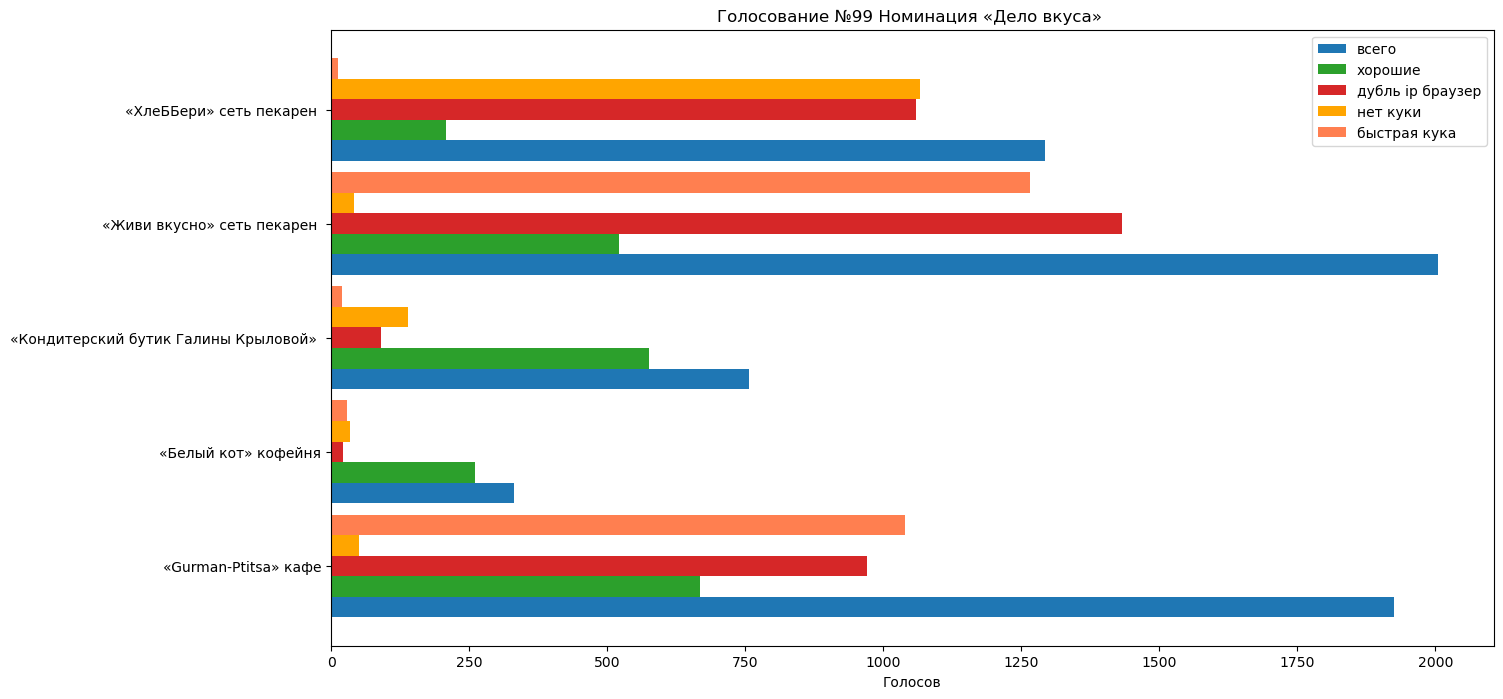

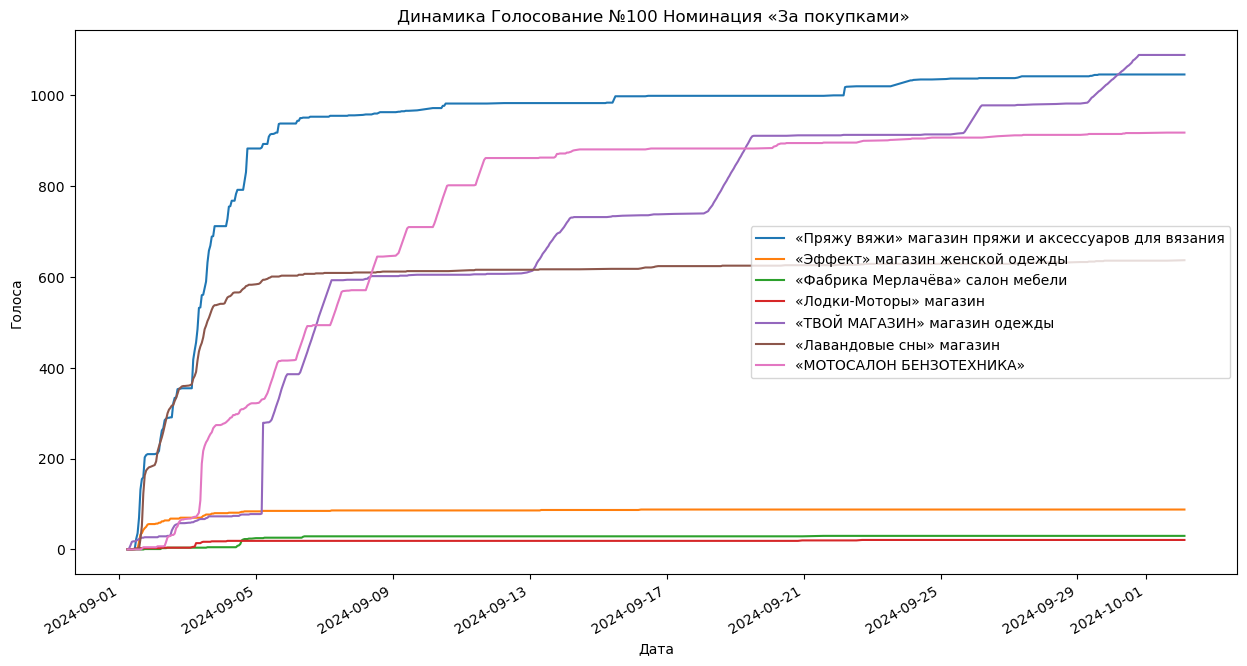

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
17,100,1,«Пряжу вяжи» магазин пряжи и аксессуаров для вязания,1046,868,82.98,878,83.94,4,0.38,160,15.30
18,100,2,«Эффект» магазин женской одежды,88,0,0.00,10,11.36,5,5.68,73,82.95
19,100,3,«Фабрика Мерлачёва» салон мебели,30,0,0.00,4,13.33,1,3.33,25,83.33
20,100,4,«Лодки-Моторы» магазин,21,0,0.00,1,4.76,0,0.00,20,95.24
21,100,5,«ТВОЙ МАГАЗИН» магазин одежды,1089,241,22.13,409,37.56,199,18.27,456,41.87
22,100,6,«Лавандовые сны» магазин,637,27,4.24,45,7.06,16,2.51,551,86.50
23,100,7,«МОТОСАЛОН БЕНЗОТЕХНИКА»,918,54,5.88,537,58.50,23,2.51,353,38.45


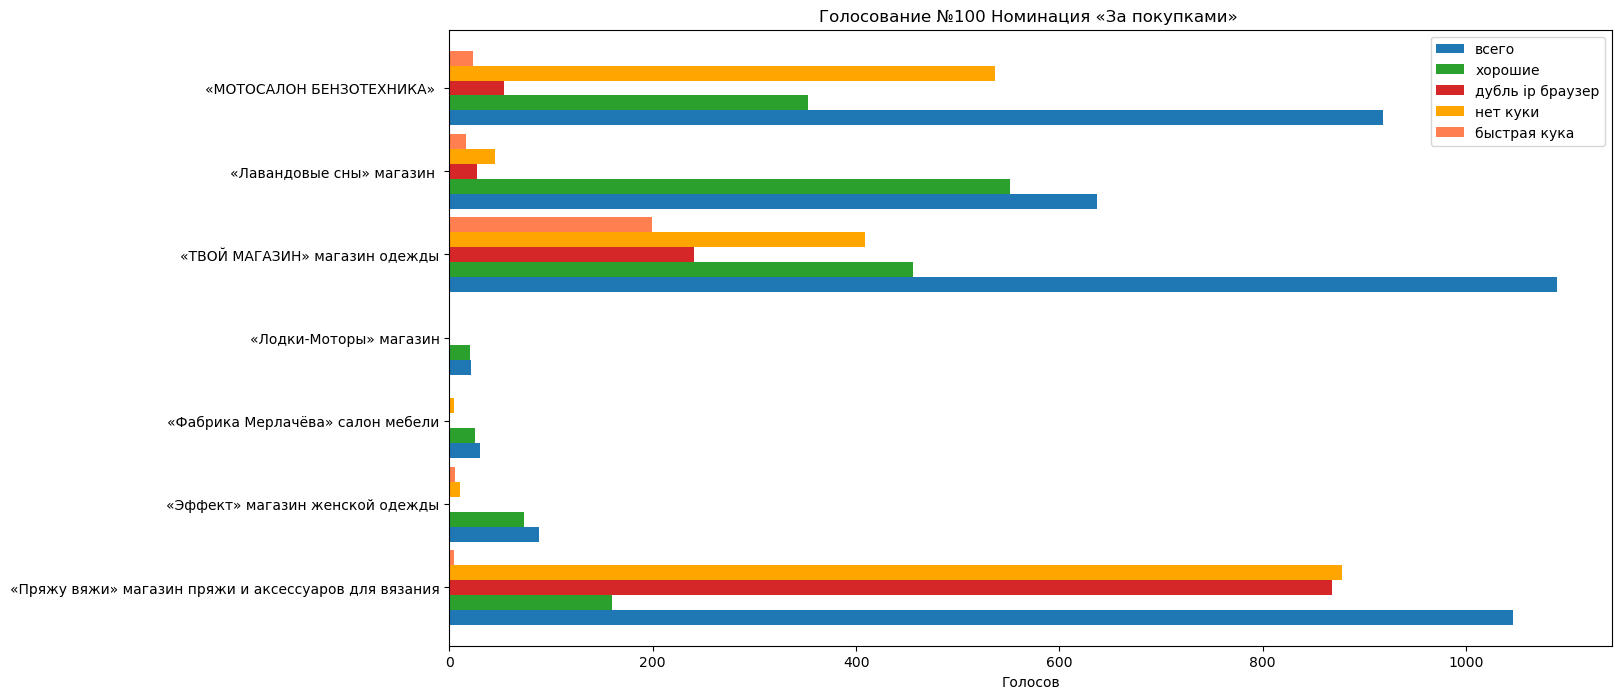

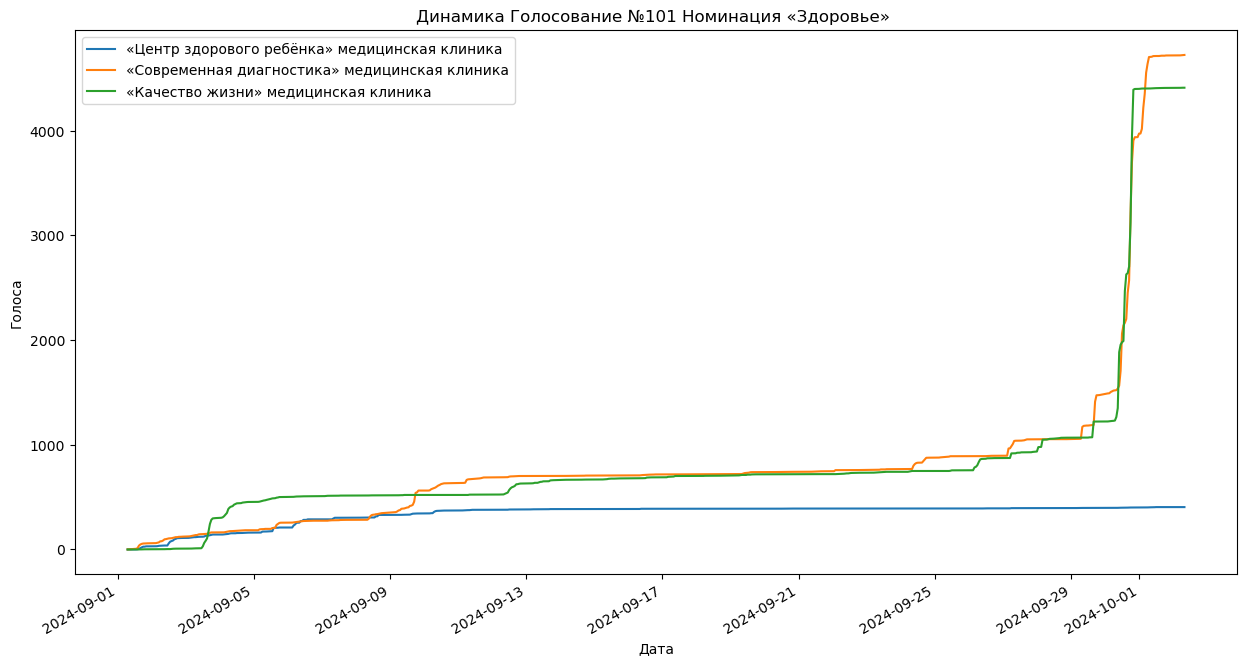

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
24,101,1,«Центр здорового ребёнка» медицинская клиника,405,167,41.23,24,5.93,141,34.81,210,51.85
25,101,2,«Современная диагностика» медицинская клиника,4724,3997,84.61,1847,39.10,1544,32.68,637,13.48
26,101,3,«Качество жизни» медицинская клиника,4411,3157,71.57,260,5.89,2213,50.17,1059,24.01


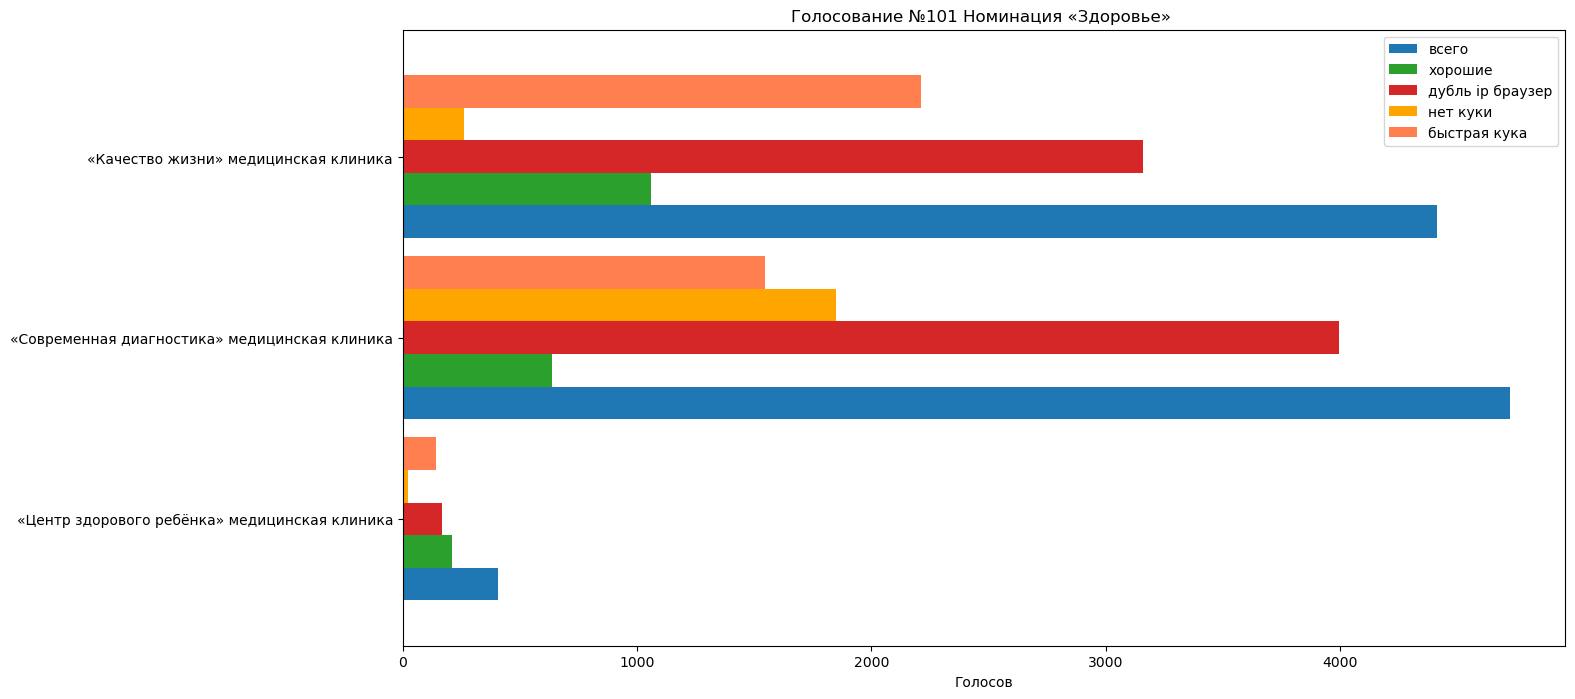

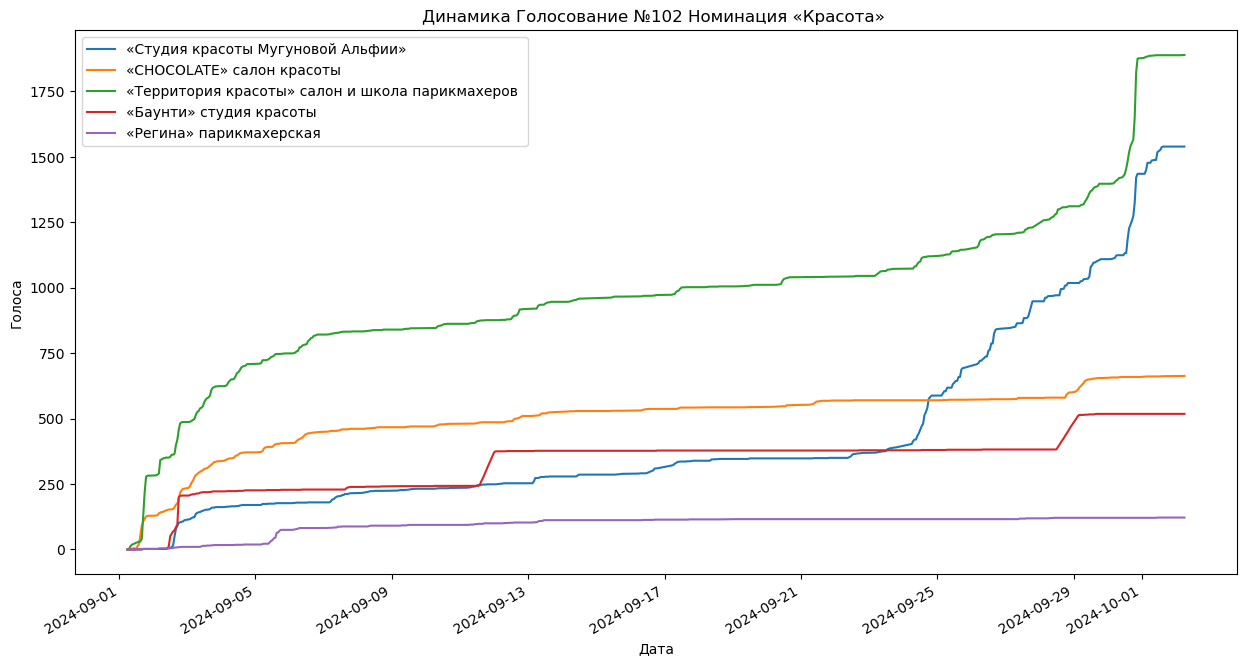

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
27,102,1,«Студия красоты Мугуновой Альфии»,1539,1162,75.50,47,3.05,265,17.22,348,22.61
28,102,2,«CHOCOLATE» салон красоты,663,29,4.37,56,8.45,19,2.87,564,85.07
29,102,3,«Территория красоты» салон и школа парикмахеров,1889,829,43.89,686,36.32,139,7.36,955,50.56
30,102,4,«Баунти» студия красоты,518,29,5.60,312,60.23,70,13.51,128,24.71
31,102,5,«Регина» парикмахерская,122,5,4.10,10,8.20,3,2.46,106,86.89


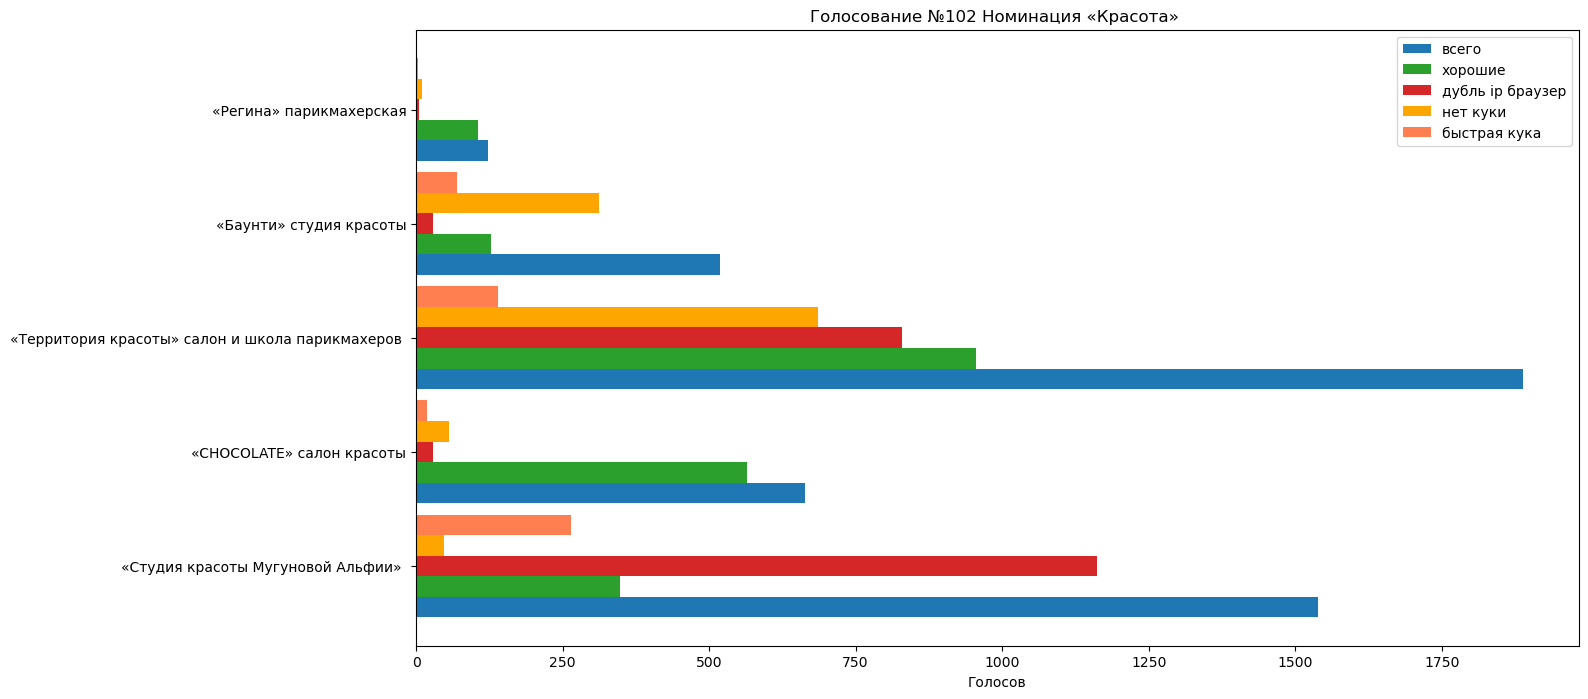

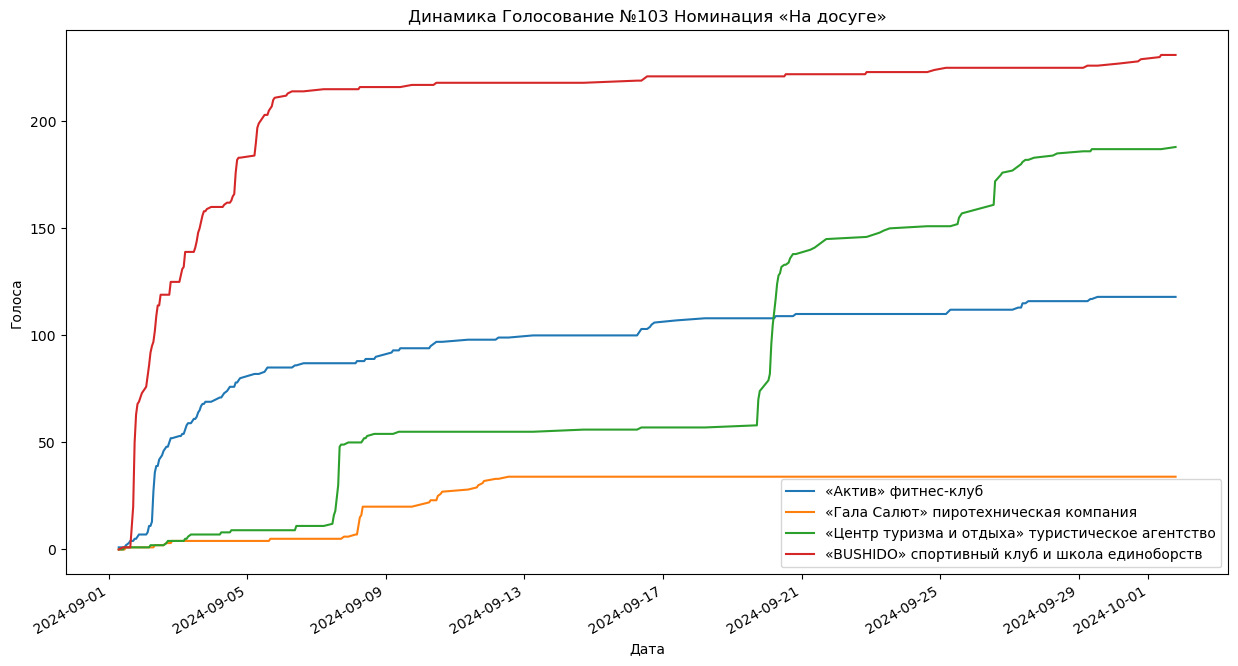

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
32,103,1,«Актив» фитнес-клуб,118,4,3.39,6,5.08,5,4.24,103,87.29
33,103,2,«Гала Cалют» пиротехническая компания,34,2,5.88,7,20.59,1,2.94,26,76.47
34,103,3,«Центр туризма и отдыха» туристическое агентство,188,8,4.26,13,6.91,3,1.60,166,88.30
35,103,4,«BUSHIDO» спортивный клуб и школа единоборств,231,5,2.16,29,12.55,12,5.19,188,81.39


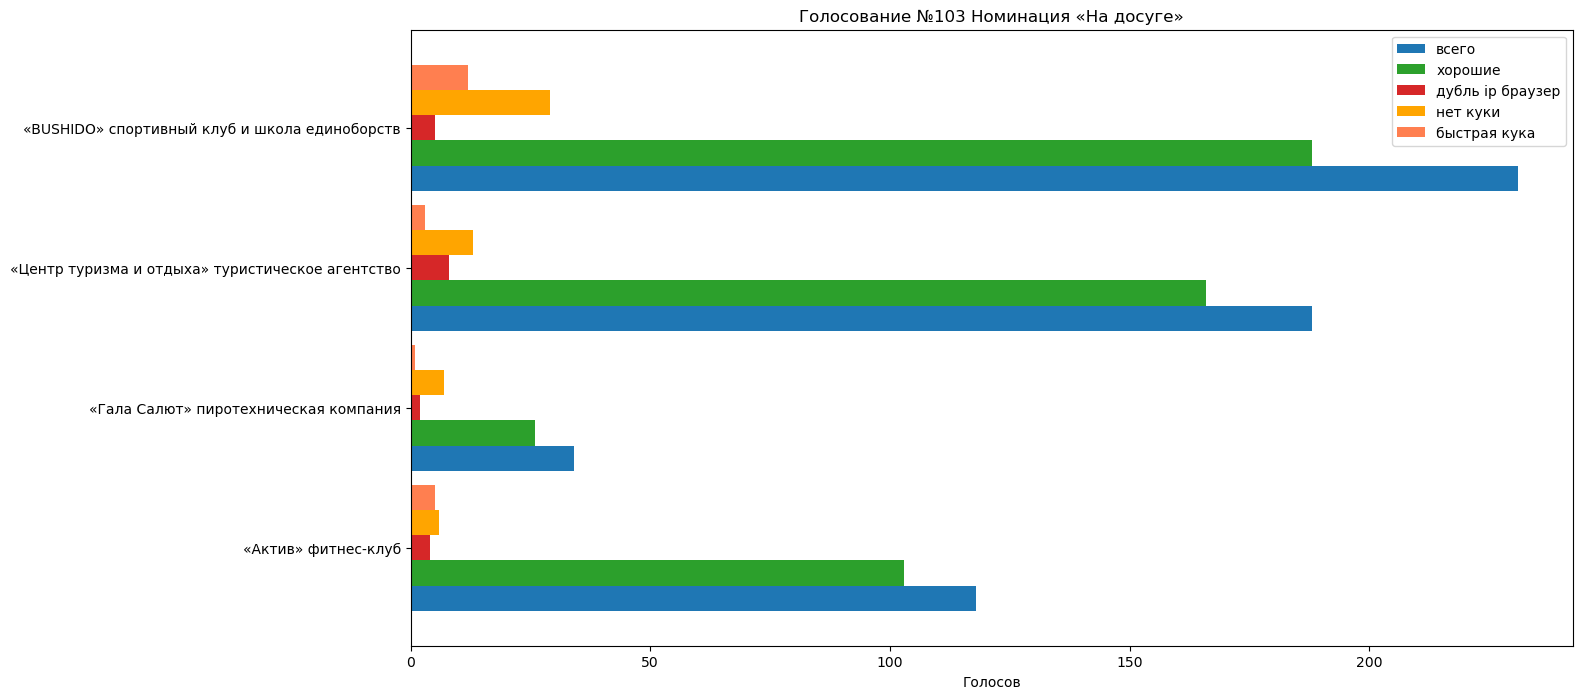

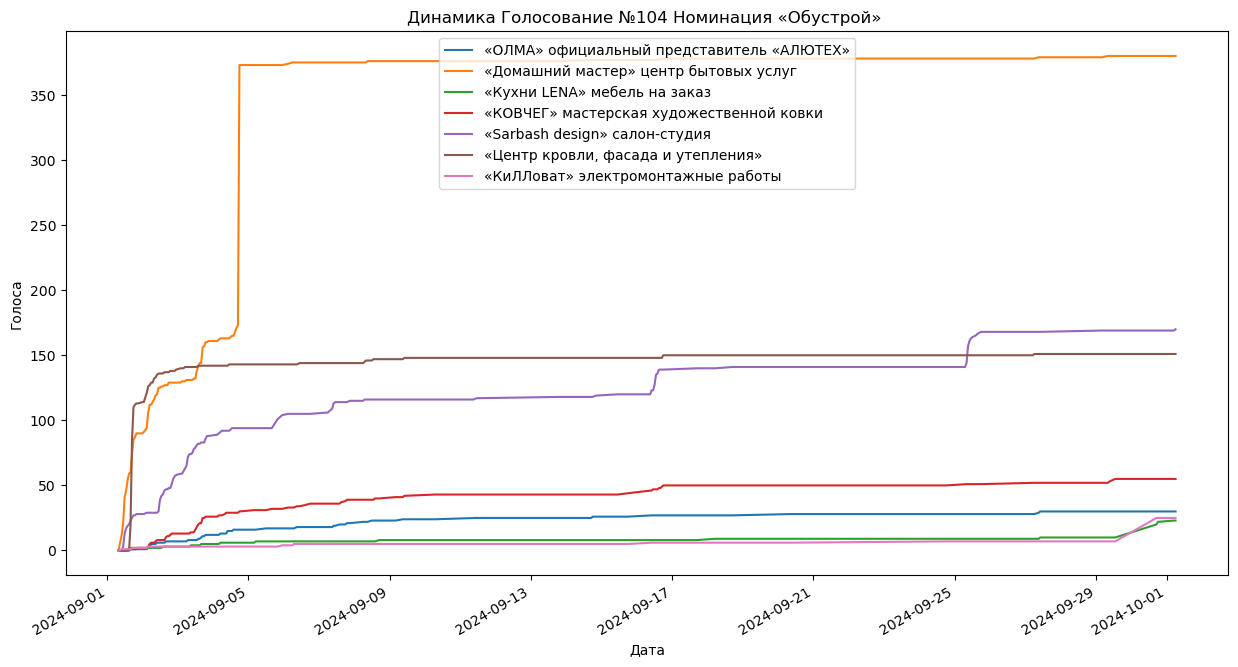

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
36,104,1,«ОЛМА» официальный представитель «АЛЮТЕХ»,30,4,13.33,1,3.33,1,3.33,24,80.00
37,104,2,«Домашний мастер» центр бытовых услуг,380,192,50.53,9,2.37,193,50.79,168,44.21
38,104,3,«Кухни LENA» мебель на заказ,23,12,52.17,14,60.87,0,0.00,9,39.13
39,104,4,«КОВЧЕГ» мастерская художественной ковки,55,0,0.00,2,3.64,1,1.82,52,94.55
40,104,5,«Sarbash design» салон-студия,170,18,10.59,25,14.71,27,15.88,114,67.06
41,104,6,"«Центр кровли, фасада и утепления»",151,49,32.45,8,5.30,24,15.89,94,62.25
42,104,7,«КиЛЛоват» электромонтажные работы,25,18,72.00,18,72.00,0,0.00,7,28.00


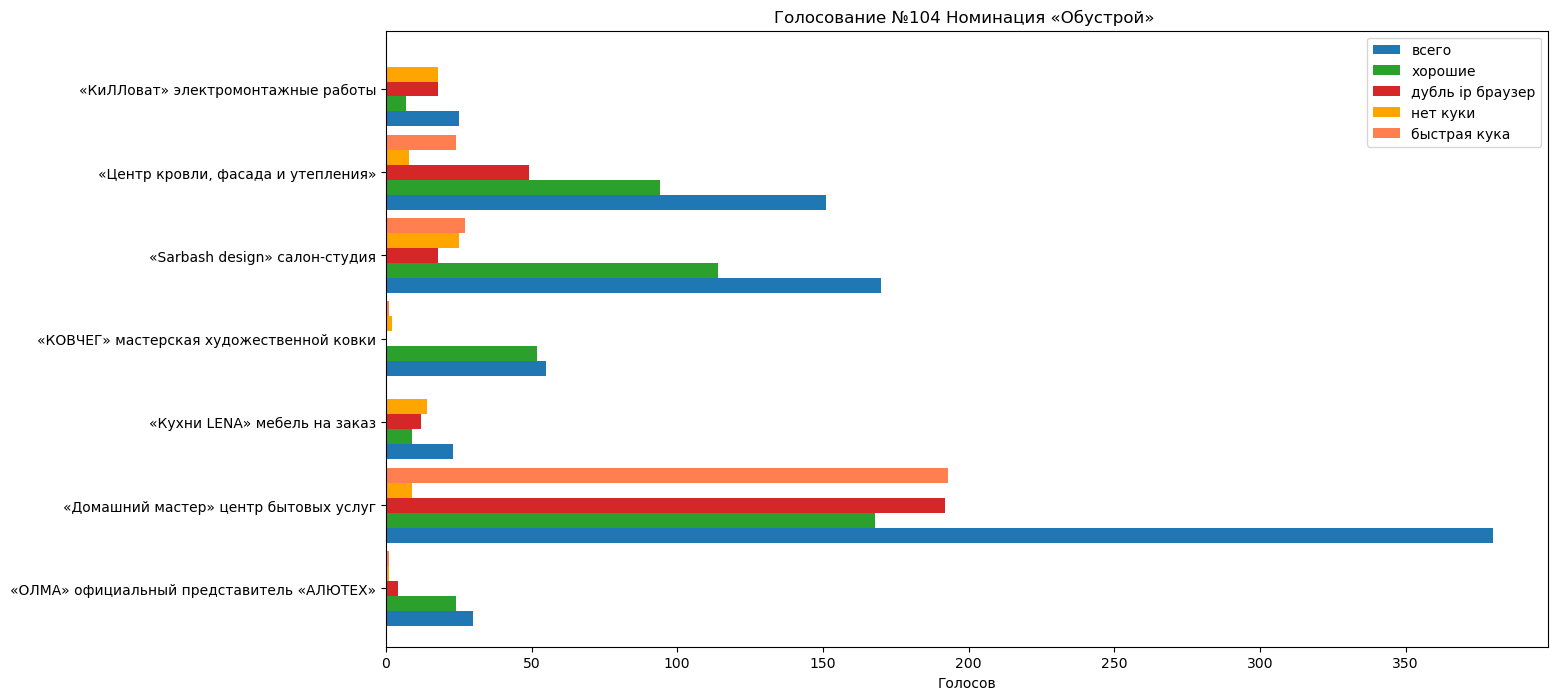

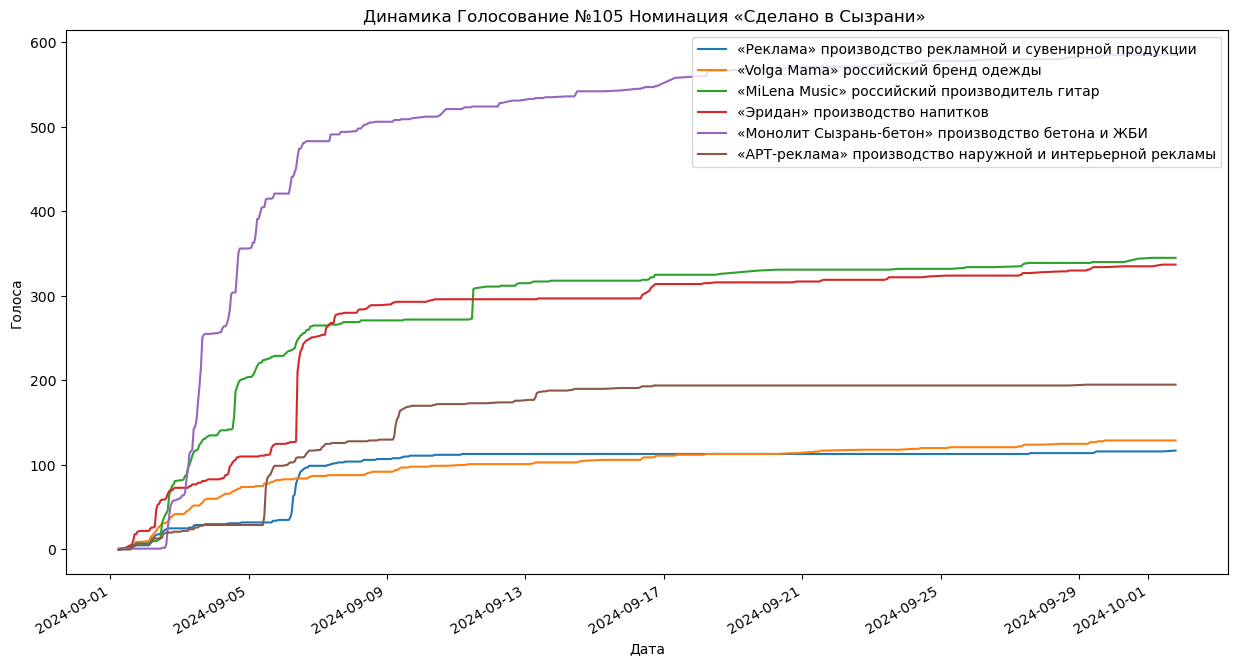

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
43,105,1,«Реклама» производство рекламной и сувенирной продукции,117,2,1.71,6,5.13,3,2.56,106,90.60
44,105,2,«Volga Mama» российский бренд одежды,129,6,4.65,6,4.65,2,1.55,116,89.92
45,105,3,«MiLena Music» российский производитель гитар,345,51,14.78,31,8.99,49,14.20,249,72.17
46,105,4,«Эридан» производство напитков,337,50,14.84,24,7.12,12,3.56,258,76.56
47,105,5,«Монолит Сызрань-бетон» производство бетона и ЖБИ,585,448,76.58,51,8.72,389,66.50,90,15.38
48,105,6,«АРТ-реклама» производство наружной и интерьерной рекламы,195,12,6.15,28,14.36,11,5.64,147,75.38


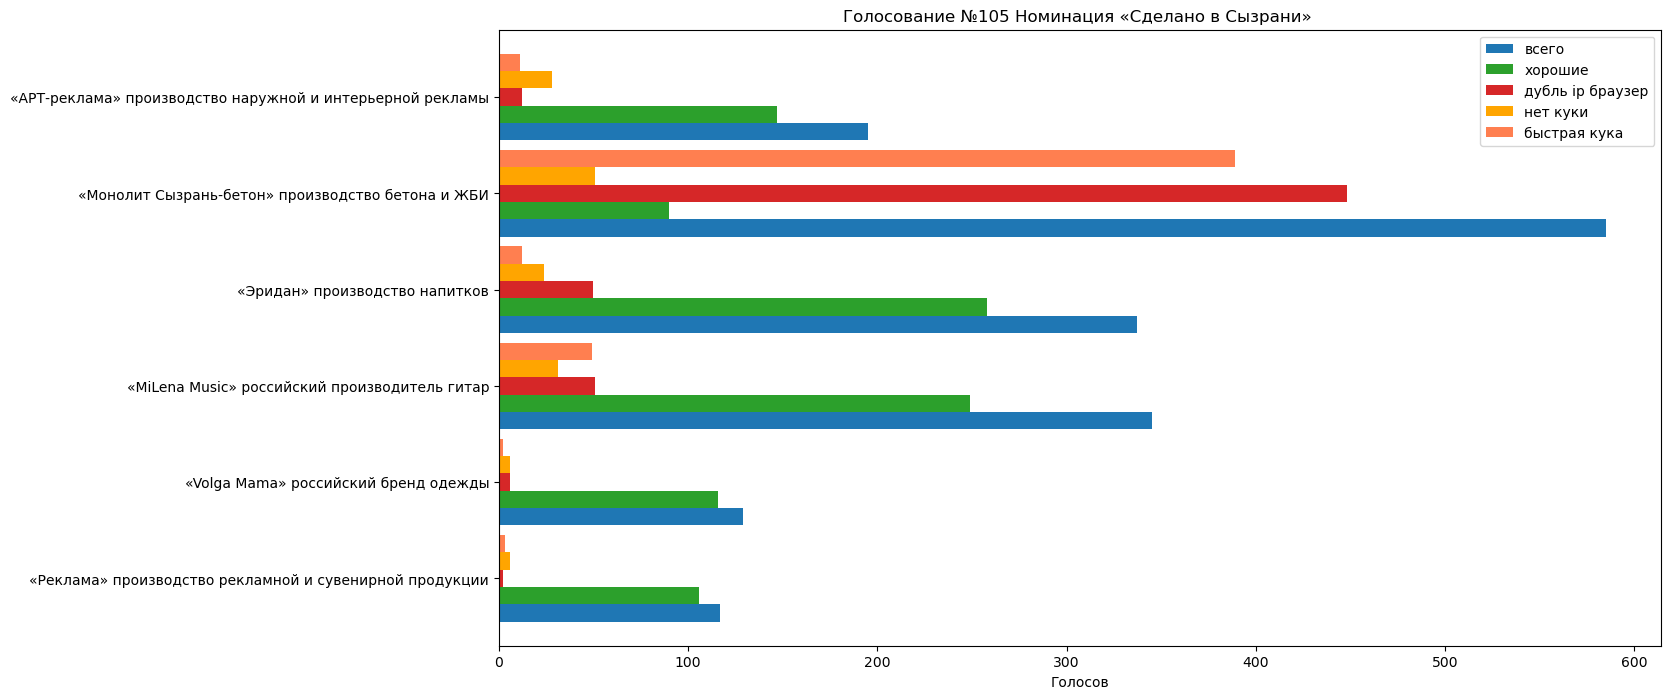

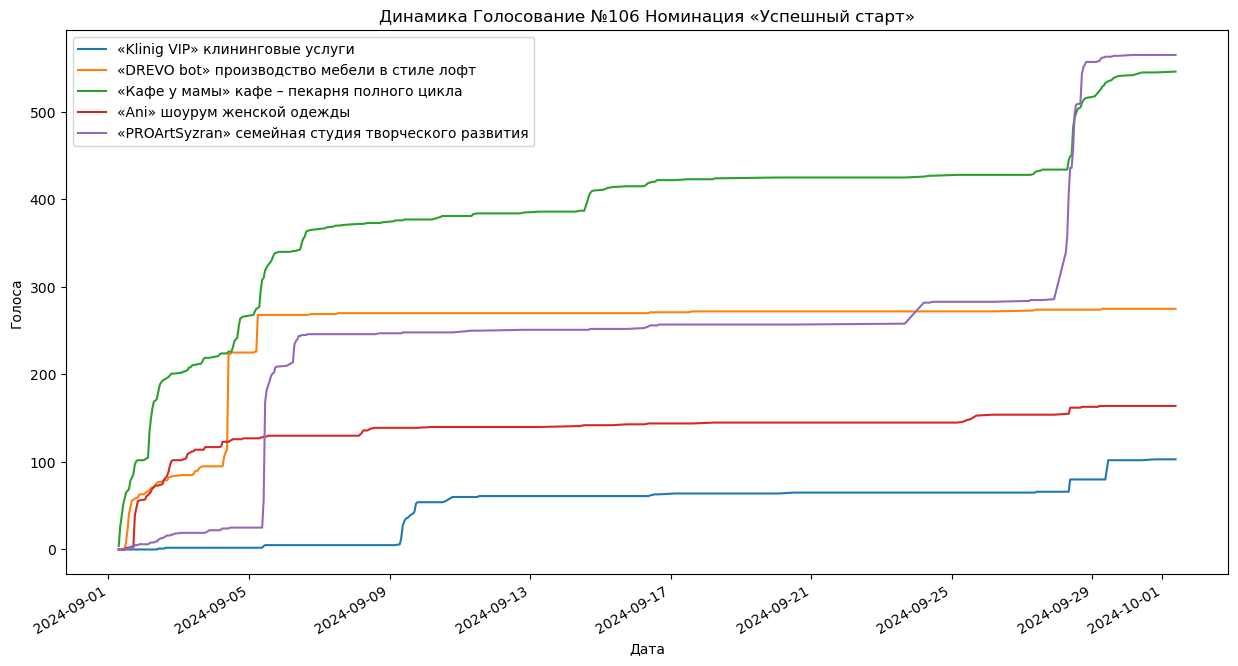

,vote,variant,Номинант,всего,дубль ip браузер,ip_%,нет куки,c_%,быстрая кука,fc_%,хорошие,g_%
49,106,1,«Klinig VIP» клининговые услуги,103,40,38.83,44,42.72,3,2.91,53,51.46
50,106,2,«DREVO bot» производство мебели в стиле лофт,275,155,56.36,16,5.82,10,3.64,96,34.91
51,106,3,«Кафе у мамы» кафе – пекарня полного цикла,546,35,6.41,31,5.68,18,3.30,471,86.26
52,106,4,«Ani» шоурум женской одежды,164,15,9.15,23,14.02,1,0.61,134,81.71
53,106,5,«PROArtSyzran» семейная студия творческого развития,565,248,43.89,154,27.26,92,16.28,284,50.27


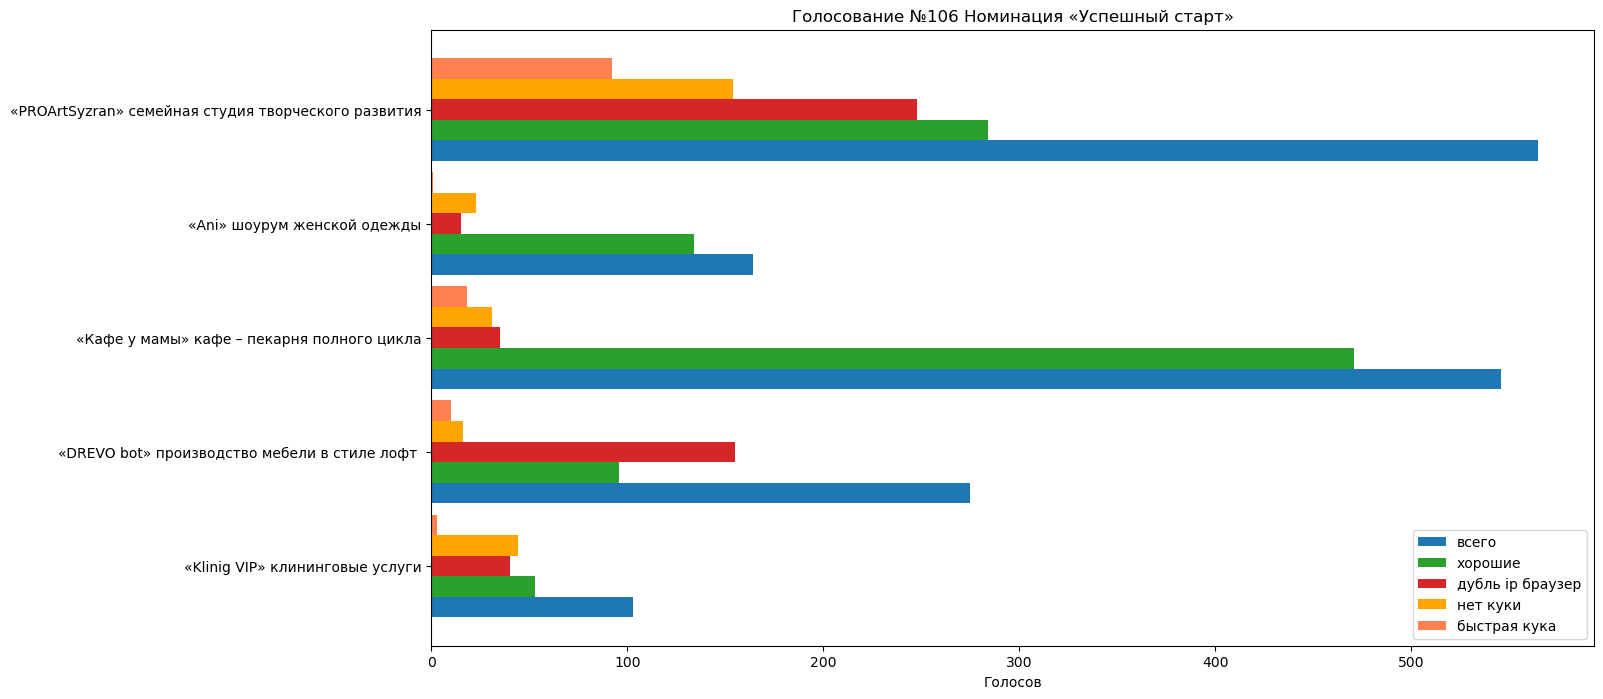

In [65]:
for vo in range(97, 107):
    title = voting.query('id == @vo')['title'].values[0]
    print()    
    print()    

    pt = data.query('vote == @vo').pivot_table(index='vote_time', columns='variant', values='cc', aggfunc='count')
    pt = pt.fillna(0)
    pt.columns = varr[vo]
        
    pt.cumsum().plot()
    plt.ylabel('Голоса')
    plt.xlabel('Дата')
    plt.title('Динамика Голосование №'+ str(vo) + ' ' + title)
    plt.show()   
    
    display(golosa_all.query('vote == @vo')\
        .style.apply(highlight_proc, proc = bad_ip_a_proc, subset='ip_%')\
        .apply(highlight_proc, proc = no_cock_proc, subset='c_%')\
        .apply(highlight_proc, proc = fast_cock_proc, subset='fc_%')\
        .apply(highlight_good, proc = good_proc, subset='g_%')\
#        .format({'дубль ip браузер %': '{:,.2f}', 'нет куки %': '{:,.2f}', 'быстрая кука %': '{:,.2f}', 'хорошие %': '{:,.2f}'})
        .format({'ip_%': '{:,.2f}', 'c_%': '{:,.2f}', 'fc_%': '{:,.2f}', 'g_%': '{:,.2f}'})
           )

    golosa_all.query('vote == @vo')[['Номинант', 'всего',  'хорошие', 'дубль ip браузер', 'нет куки', 'быстрая кука']]\
        .set_index('Номинант')\
        .plot.barh(rot = 0, width=0.9, color={'всего': 'tab:blue', 'дубль ip браузер' : 'tab:red', 
                                              'нет куки' : 'orange', 'быстрая кука' : 'coral', 
                                              'хорошие' : 'tab:green'})
    plt.ylabel('')
    plt.xlabel('Голосов')
    plt.title('Голосование №'+ str(vo) + ' ' + title)
    plt.show()   
    
    

### Рейтинги по разным критериям

In [66]:
raiting = golosa_all[['vote', 'variant', 'Номинант', 'всего', 'хорошие', 'дубль ip браузер']].copy()

In [67]:
raiting['без кук'] = raiting['всего'] - raiting['дубль ip браузер']

In [68]:
raiting = raiting.drop('дубль ip браузер', axis = 1)

красным измерения рейтинга при учете только дублей ip_браузер без кук

In [84]:
raiting.style.apply(lambda x: ["background: red" if x.iloc[0] != x.iloc[1] else "background: lime" for v in x]
                    , axis = 1, subset=['R хорошие', 'R без кук'])

,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
0,97,1,«Ollium» центр интеллектуального развития,46,26,28,5,6,6
1,97,2,«Юла» детская развивающая студия,197,171,190,1,1,1
2,97,3,«КВАТУТ» батутный центр,34,31,32,6,5,5
3,97,4,«Волшебный мир» агентство детских праздников,102,88,98,2,2,2
4,97,5,«Радуга» магазин детской одежды,46,45,46,5,4,4
5,97,6,«KIBERone» IT школа,53,49,51,3,3,3
6,98,1,«Добро» патронажное агентство,283,87,114,2,2,2
7,98,2,«SYZRAN- IT» сервисный центр,373,305,348,1,1,1
8,98,3,«Экосервис» клининговая компания,2,2,2,6,6,6
9,98,4,«Еврочистка» сеть химчисток,22,20,22,5,5,5


In [69]:
raiting['R всего'] = raiting.groupby(['vote'])['всего'].rank(method='max', ascending=False).astype('int')
raiting['R хорошие'] = raiting.groupby(['vote'])['хорошие'].rank(method='max', ascending=False).astype('int')
raiting['R без кук'] = raiting.groupby(['vote'])['без кук'].rank(method='max', ascending=False).astype('int')

In [83]:
for vo in range(97, 107):
    title = voting.query('id == @vo')['title'].values[0]
    print('Рейтинги с учетом различных критериев по номинации', title)    
    display(raiting[raiting['vote'] == vo].style.apply(lambda x: ["background: red" 
                if x.iloc[0] != x.iloc[1] else "background: lime" for v in x]
                , axis = 1, subset=['R хорошие', 'R без кук']))
    print()
    print()    

Рейтинги с учетом различных критериев по номинации Номинация «Бизнес-для детей» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
0,97,1,«Ollium» центр интеллектуального развития,46,26,28,5,6,6
1,97,2,«Юла» детская развивающая студия,197,171,190,1,1,1
2,97,3,«КВАТУТ» батутный центр,34,31,32,6,5,5
3,97,4,«Волшебный мир» агентство детских праздников,102,88,98,2,2,2
4,97,5,«Радуга» магазин детской одежды,46,45,46,5,4,4
5,97,6,«KIBERone» IT школа,53,49,51,3,3,3




Рейтинги с учетом различных критериев по номинации Номинация «Вам помогут» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
6,98,1,«Добро» патронажное агентство,283,87,114,2,2,2
7,98,2,«SYZRAN- IT» сервисный центр,373,305,348,1,1,1
8,98,3,«Экосервис» клининговая компания,2,2,2,6,6,6
9,98,4,«Еврочистка» сеть химчисток,22,20,22,5,5,5
10,98,5,«Cheese Photo» фотосалон,37,35,37,4,4,4
11,98,6,«Колибри» рекламное агентство,94,81,92,3,3,3




Рейтинги с учетом различных критериев по номинации Номинация «Дело вкуса» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
12,99,1,«Gurman-Ptitsa» кафе,1924,668,954,2,1,1
13,99,2,«Белый кот» кофейня,332,260,310,5,4,4
14,99,3,«Кондитерский бутик Галины Крыловой»,757,576,667,4,2,2
15,99,4,«Живи вкусно» сеть пекарен,2005,522,572,1,3,3
16,99,5,«ХлеББери» сеть пекарен,1292,208,233,3,5,5




Рейтинги с учетом различных критериев по номинации Номинация «За покупками» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
17,100,1,«Пряжу вяжи» магазин пряжи и аксессуаров для вязания,1046,160,178,2,4,4
18,100,2,«Эффект» магазин женской одежды,88,73,88,5,5,5
19,100,3,«Фабрика Мерлачёва» салон мебели,30,25,30,6,6,6
20,100,4,«Лодки-Моторы» магазин,21,20,21,7,7,7
21,100,5,«ТВОЙ МАГАЗИН» магазин одежды,1089,456,848,1,2,2
22,100,6,«Лавандовые сны» магазин,637,551,610,4,1,3
23,100,7,«МОТОСАЛОН БЕНЗОТЕХНИКА»,918,353,864,3,3,1




Рейтинги с учетом различных критериев по номинации Номинация «Здоровье» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
24,101,1,«Центр здорового ребёнка» медицинская клиника,405,210,238,3,3,3
25,101,2,«Современная диагностика» медицинская клиника,4724,637,727,1,2,2
26,101,3,«Качество жизни» медицинская клиника,4411,1059,1254,2,1,1




Рейтинги с учетом различных критериев по номинации Номинация «Красота» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
27,102,1,«Студия красоты Мугуновой Альфии»,1539,348,377,2,3,4
28,102,2,«CHOCOLATE» салон красоты,663,564,634,3,2,2
29,102,3,«Территория красоты» салон и школа парикмахеров,1889,955,1060,1,1,1
30,102,4,«Баунти» студия красоты,518,128,489,4,4,3
31,102,5,«Регина» парикмахерская,122,106,117,5,5,5




Рейтинги с учетом различных критериев по номинации Номинация «На досуге»


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
32,103,1,«Актив» фитнес-клуб,118,103,114,3,3,3
33,103,2,«Гала Cалют» пиротехническая компания,34,26,32,4,4,4
34,103,3,«Центр туризма и отдыха» туристическое агентство,188,166,180,2,2,2
35,103,4,«BUSHIDO» спортивный клуб и школа единоборств,231,188,226,1,1,1




Рейтинги с учетом различных критериев по номинации Номинация «Обустрой» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
36,104,1,«ОЛМА» официальный представитель «АЛЮТЕХ»,30,24,26,5,5,5
37,104,2,«Домашний мастер» центр бытовых услуг,380,168,188,1,1,1
38,104,3,«Кухни LENA» мебель на заказ,23,9,11,7,6,6
39,104,4,«КОВЧЕГ» мастерская художественной ковки,55,52,55,4,4,4
40,104,5,«Sarbash design» салон-студия,170,114,152,2,2,2
41,104,6,"«Центр кровли, фасада и утепления»",151,94,102,3,3,3
42,104,7,«КиЛЛоват» электромонтажные работы,25,7,7,6,7,7




Рейтинги с учетом различных критериев по номинации Номинация «Сделано в Сызрани» 


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
43,105,1,«Реклама» производство рекламной и сувенирной продукции,117,106,115,6,5,6
44,105,2,«Volga Mama» российский бренд одежды,129,116,123,5,4,5
45,105,3,«MiLena Music» российский производитель гитар,345,249,294,2,2,1
46,105,4,«Эридан» производство напитков,337,258,287,3,1,2
47,105,5,«Монолит Сызрань-бетон» производство бетона и ЖБИ,585,90,137,1,6,4
48,105,6,«АРТ-реклама» производство наружной и интерьерной рекламы,195,147,183,4,3,3




Рейтинги с учетом различных критериев по номинации Номинация «Успешный старт»


,vote,variant,Номинант,всего,хорошие,без кук,R всего,R хорошие,R без кук
49,106,1,«Klinig VIP» клининговые услуги,103,53,63,5,5,5
50,106,2,«DREVO bot» производство мебели в стиле лофт,275,96,120,3,4,4
51,106,3,«Кафе у мамы» кафе – пекарня полного цикла,546,471,511,2,1,1
52,106,4,«Ani» шоурум женской одежды,164,134,149,4,3,3
53,106,5,«PROArtSyzran» семейная студия творческого развития,565,284,317,1,2,2
